In [1]:
# import tensorflow as tf
# import keras as k
# import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_gen = ImageDataGenerator(rescale = 1./255,
                              horizontal_flip = True,
                              shear_range = 0.2,
                              zoom_range = 0.2,rotation_range = 35,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              fill_mode='nearest',
                              validation_split = 0.2)

test_gen = ImageDataGenerator(rescale=1./255)

In [3]:
train_set = train_gen.flow_from_directory(directory = 'F:/simplilearn/projects/DL projects/cat dog classification/train',
                                          target_size = (128,128),
                                          batch_size= 16,
                                          class_mode = 'binary',
                                          color_mode = 'rgb',
                                          shuffle=True,
                                          subset = 'training'
                                          )

valid_set = train_gen.flow_from_directory(directory = 'F:/simplilearn/projects/DL projects/cat dog classification/train',
                                          target_size = (128,128),
                                          batch_size= 4,
                                          class_mode = 'binary',
                                          color_mode = 'rgb',
                                          shuffle=True,
                                          subset = 'validation')

test_set = test_gen.flow_from_directory(directory = 'F:/simplilearn/projects/DL projects/cat dog classification/test',
                                        target_size = (128,128),
                                        batch_size=1,
                                        color_mode='rgb',                                        class_mode='binary',shuffle = True
                                        )

Found 32 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Dropout , BatchNormalization,Flatten ,Dense

# with 100 epochs

In [5]:
model = Sequential([
  Conv2D(32,(5,5),input_shape = (128,128,3),activation = 'relu'),
  MaxPooling2D((2,2),strides = 2),
  Conv2D(64,(5,5),activation='relu'),
  MaxPooling2D((2,2),strides = 2),
  Flatten(),
  Dense(128,activation='relu'),
  Dropout(0.4),
  Dense(1,activation='softmax')
])

In [19]:
# from keras.utils import plot_model
# plot_model(model,show_shapes=True)

In [7]:
model.compile(optimizer='adam',metrics = ['accuracy'],loss= 'binary_crossentropy')

In [8]:
model.fit_generator(train_set , steps_per_epoch = train_set.n//16, epochs = 100 , validation_data =test_set ,validation_steps = valid_set.n//4 )

Epoch 1/100
2/2 [==============================] - 4s 1s/step - loss: 1.0566 - accuracy: 0.5000 - val_loss: 1.3777 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 2s 756ms/step - loss: 0.8323 - accuracy: 0.5000 - val_loss: 0.4460 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 2s 996ms/step - loss: 0.7457 - accuracy: 0.5000 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 2s 931ms/step - loss: 0.6913 - accuracy: 0.5000 - val_loss: 0.6844 - val_accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 2s 897ms/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 2s 722ms/step - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 2s 739ms/step - loss: 0.6854 - accuracy: 0.5000 - val_loss: 0.6813 - val_accuracy: 1.0000
Epoch 8/100


2/2 [==============================] - 2s 738ms/step - loss: 0.5610 - accuracy: 0.5000 - val_loss: 0.8445 - val_accuracy: 1.0000
Epoch 59/100
2/2 [==============================] - 2s 766ms/step - loss: 0.6118 - accuracy: 0.5000 - val_loss: 0.7962 - val_accuracy: 0.5000
Epoch 60/100
2/2 [==============================] - 2s 854ms/step - loss: 0.5444 - accuracy: 0.5000 - val_loss: 2.1016 - val_accuracy: 0.0000e+00
Epoch 61/100
2/2 [==============================] - 2s 846ms/step - loss: 0.6226 - accuracy: 0.5000 - val_loss: 0.8149 - val_accuracy: 0.5000
Epoch 62/100
2/2 [==============================] - 2s 780ms/step - loss: 0.5333 - accuracy: 0.5000 - val_loss: 1.3786 - val_accuracy: 1.0000
Epoch 63/100
2/2 [==============================] - 2s 763ms/step - loss: 0.5642 - accuracy: 0.5000 - val_loss: 0.5535 - val_accuracy: 1.0000
Epoch 64/100
2/2 [==============================] - 2s 815ms/step - loss: 0.8518 - accuracy: 0.5000 - val_loss: 0.7488 - val_accuracy: 0.5000
Epoch 65/100
2/

In [20]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

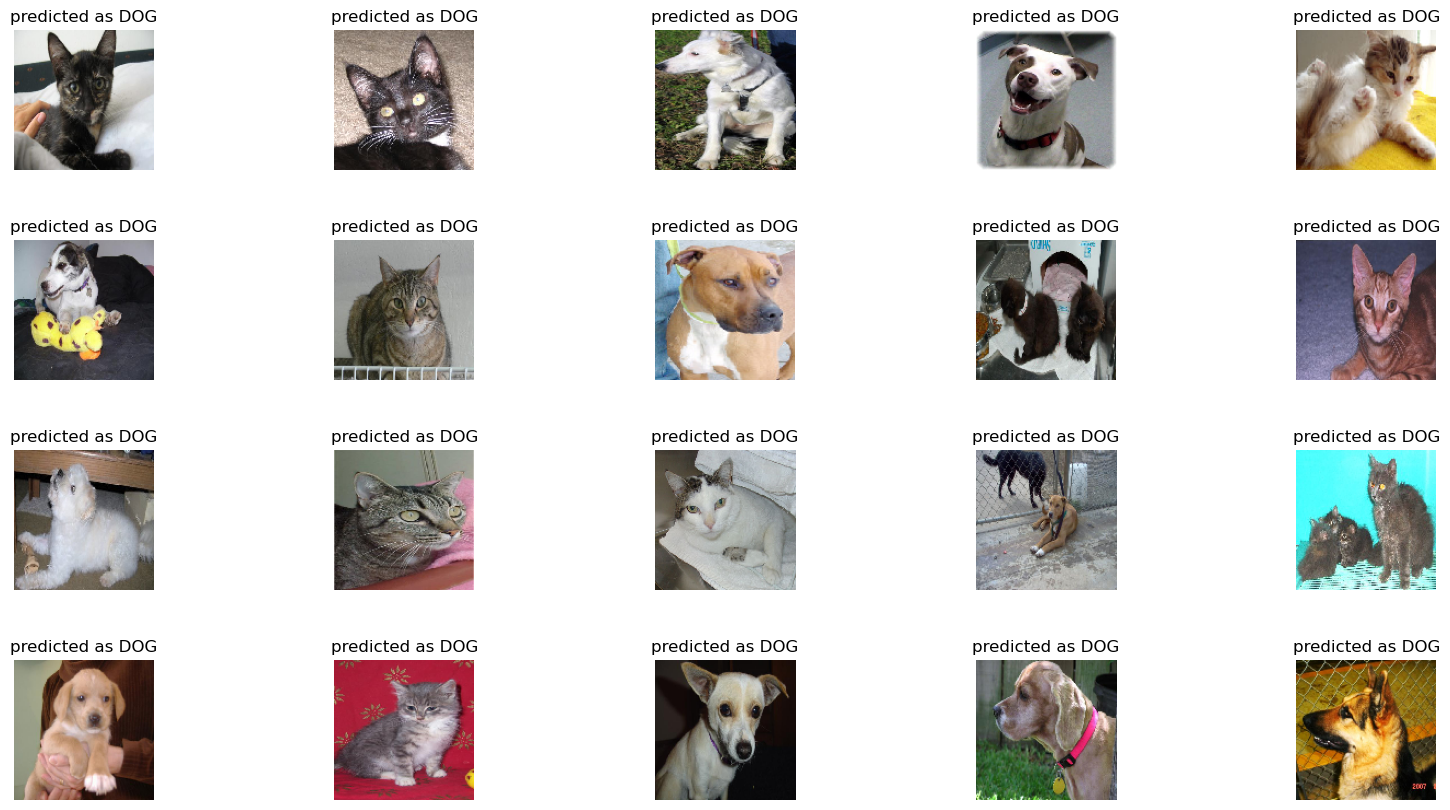

In [21]:
pred = model.predict_generator(test_set)

plt.subplots(4,5,figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
for i in range(20):
  plt.subplot(4,5,i+1)
  img = np.squeeze(test_set[i][0])
  plt.imshow(img)
  if pred[i]==0:
    plt.title('predicted as CAT',loc='center')
  else:
    plt.title('predicted as DOG',loc='center')
  plt.axis('off')
plt.show()

#we can see that all the images are predicted as 'DOG'

# now lets do the same with 200 epochs

In [11]:
model = Sequential([
  Conv2D(32,(5,5),input_shape = (128,128,3),activation = 'relu'),
  MaxPooling2D((2,2),strides = 2),
  Conv2D(64,(5,5),activation='relu'),
  MaxPooling2D((2,2),strides = 2),
  Flatten(),
  Dense(128,activation='relu'),
  Dropout(0.4),
  Dense(1,activation='softmax')
])

In [12]:
model.compile(optimizer='adam',metrics = ['accuracy'],loss= 'binary_crossentropy')

In [13]:
model.fit_generator(train_set , steps_per_epoch = train_set.n//16, epochs = 200 , validation_data =test_set ,validation_steps = valid_set.n//4 )

Epoch 1/200
2/2 [==============================] - 4s 1s/step - loss: 1.0331 - accuracy: 0.5000 - val_loss: 6.9691 - val_accuracy: 1.0000
Epoch 2/200
2/2 [==============================] - 2s 772ms/step - loss: 2.9104 - accuracy: 0.5000 - val_loss: 0.7107 - val_accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 2s 807ms/step - loss: 0.7510 - accuracy: 0.5000 - val_loss: 0.6320 - val_accuracy: 1.0000
Epoch 4/200
2/2 [==============================] - 2s 792ms/step - loss: 0.6899 - accuracy: 0.5000 - val_loss: 0.6868 - val_accuracy: 1.0000
Epoch 5/200
2/2 [==============================] - 2s 790ms/step - loss: 0.6884 - accuracy: 0.5000 - val_loss: 0.7147 - val_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 2s 763ms/step - loss: 0.6870 - accuracy: 0.5000 - val_loss: 0.6608 - val_accuracy: 0.0000e+00
Epoch 7/200
2/2 [==============================] - 2s 757ms/step - loss: 0.6774 - accuracy: 0.5000 - val_loss: 0.4746 - val_accuracy: 0.5000
Epoch 8/200


2/2 [==============================] - 2s 1s/step - loss: 0.5333 - accuracy: 0.5000 - val_loss: 0.6452 - val_accuracy: 0.0000e+00
Epoch 59/200
2/2 [==============================] - 2s 1s/step - loss: 0.5179 - accuracy: 0.5000 - val_loss: 0.3944 - val_accuracy: 1.0000
Epoch 60/200
2/2 [==============================] - 2s 1s/step - loss: 0.4281 - accuracy: 0.5000 - val_loss: 1.3721 - val_accuracy: 1.0000
Epoch 61/200
2/2 [==============================] - 2s 900ms/step - loss: 0.4693 - accuracy: 0.5000 - val_loss: 0.0256 - val_accuracy: 0.5000
Epoch 62/200
2/2 [==============================] - 2s 822ms/step - loss: 0.3922 - accuracy: 0.5000 - val_loss: 0.0443 - val_accuracy: 1.0000
Epoch 63/200
2/2 [==============================] - 2s 808ms/step - loss: 0.5637 - accuracy: 0.5000 - val_loss: 0.3196 - val_accuracy: 1.0000
Epoch 64/200
2/2 [==============================] - 2s 775ms/step - loss: 0.4836 - accuracy: 0.5000 - val_loss: 0.7202 - val_accuracy: 0.5000
Epoch 65/200
2/2 [======

2/2 [==============================] - 2s 752ms/step - loss: 0.3100 - accuracy: 0.5000 - val_loss: 4.1323 - val_accuracy: 0.0000e+00
Epoch 116/200
2/2 [==============================] - 2s 740ms/step - loss: 0.4413 - accuracy: 0.5000 - val_loss: 1.5247 - val_accuracy: 0.5000
Epoch 117/200
2/2 [==============================] - 2s 769ms/step - loss: 0.3647 - accuracy: 0.5000 - val_loss: 0.4013 - val_accuracy: 0.0000e+00
Epoch 118/200
2/2 [==============================] - 2s 740ms/step - loss: 0.3163 - accuracy: 0.5000 - val_loss: 0.1268 - val_accuracy: 0.5000
Epoch 119/200
2/2 [==============================] - 2s 736ms/step - loss: 0.3223 - accuracy: 0.5000 - val_loss: 1.7064 - val_accuracy: 0.5000
Epoch 120/200
2/2 [==============================] - 2s 753ms/step - loss: 0.2346 - accuracy: 0.5000 - val_loss: 0.4969 - val_accuracy: 0.5000
Epoch 121/200
2/2 [==============================] - 2s 719ms/step - loss: 0.5336 - accuracy: 0.5000 - val_loss: 0.2764 - val_accuracy: 0.5000
Epoch

2/2 [==============================] - 2s 734ms/step - loss: 0.2845 - accuracy: 0.5000 - val_loss: 0.8431 - val_accuracy: 0.5000
Epoch 173/200
2/2 [==============================] - 2s 753ms/step - loss: 0.5114 - accuracy: 0.5000 - val_loss: 0.1308 - val_accuracy: 0.0000e+00
Epoch 174/200
2/2 [==============================] - 2s 722ms/step - loss: 0.5086 - accuracy: 0.5000 - val_loss: 0.6276 - val_accuracy: 0.5000
Epoch 175/200
2/2 [==============================] - 2s 737ms/step - loss: 0.4797 - accuracy: 0.5000 - val_loss: 1.1247 - val_accuracy: 0.5000
Epoch 176/200
2/2 [==============================] - 2s 752ms/step - loss: 0.2532 - accuracy: 0.5000 - val_loss: 1.2631 - val_accuracy: 0.5000
Epoch 177/200
2/2 [==============================] - 2s 732ms/step - loss: 0.3538 - accuracy: 0.5000 - val_loss: 1.7328 - val_accuracy: 1.0000
Epoch 178/200
2/2 [==============================] - 2s 850ms/step - loss: 0.4574 - accuracy: 0.5000 - val_loss: 0.4449 - val_accuracy: 1.0000
Epoch 179

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

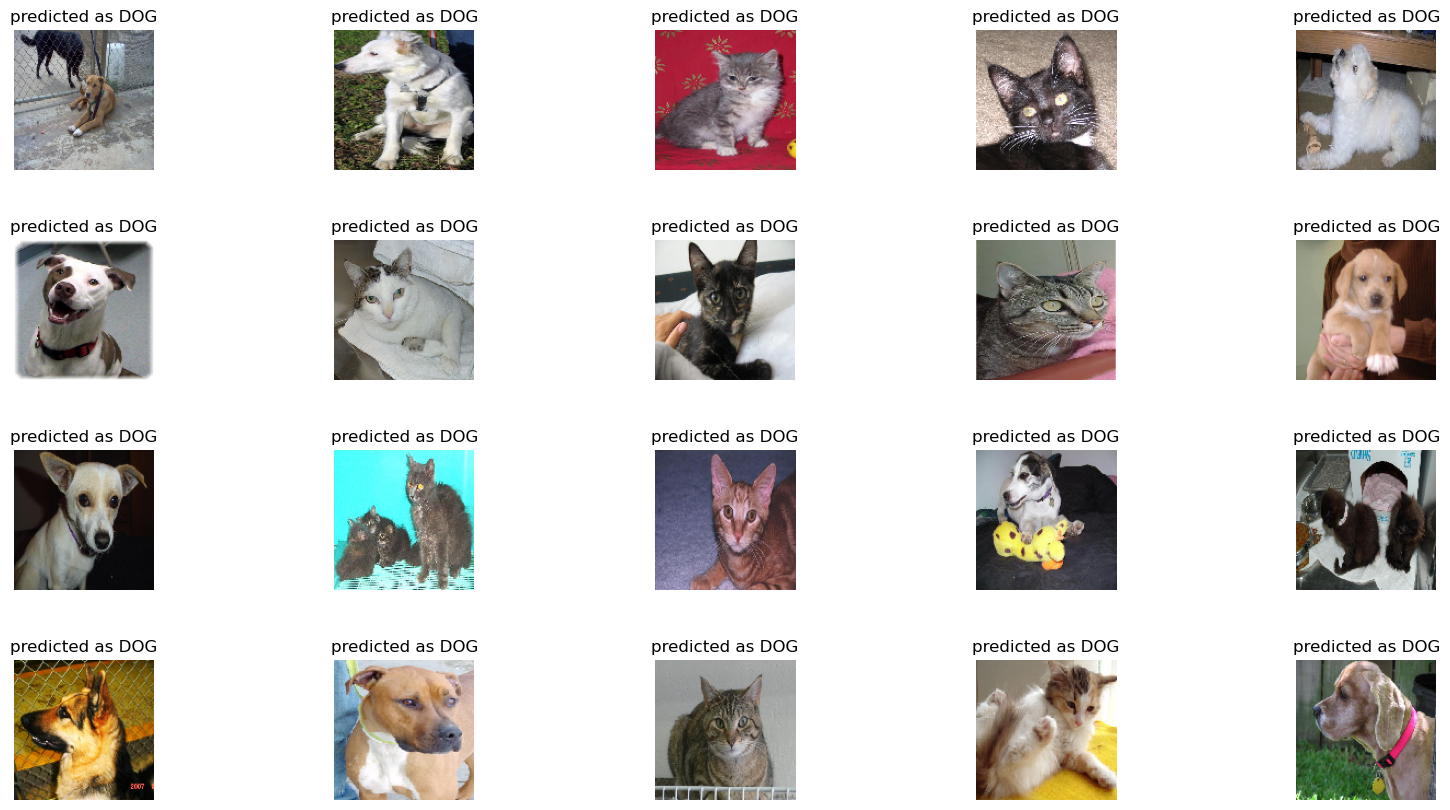

In [22]:
pred = model.predict_generator(test_set)

plt.subplots(4,5,figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
for i in range(20):
  plt.subplot(4,5,i+1)
  img = np.squeeze(test_set[i][0])
  plt.imshow(img)
  if pred[i]==0:
    plt.title('predicted as CAT',loc='center')
  else:
    plt.title('predicted as DOG',loc='center')
  plt.axis('off')
plt.show()

#we can see that all the images are predicted as 'DOG'

# now with 300 iterations

In [15]:
model = Sequential([
  Conv2D(32,(5,5),input_shape = (128,128,3),activation = 'relu'),
  MaxPooling2D((2,2),strides = 2),
  Conv2D(64,(5,5),activation='relu'),
  MaxPooling2D((2,2),strides = 2),
  Flatten(),
  Dense(128,activation='relu'),
  Dropout(0.4),
  Dense(1,activation='softmax')
])

In [16]:
model.compile(optimizer='adam',metrics = ['accuracy'],loss= 'binary_crossentropy')

In [17]:
model.fit_generator(train_set , steps_per_epoch = train_set.n//16, epochs = 300 , validation_data =test_set ,validation_steps = valid_set.n//4 )

Epoch 1/300
2/2 [==============================] - 4s 995ms/step - loss: 1.7291 - accuracy: 0.5000 - val_loss: 0.3581 - val_accuracy: 1.0000
Epoch 2/300
2/2 [==============================] - 2s 739ms/step - loss: 0.8083 - accuracy: 0.5000 - val_loss: 0.7246 - val_accuracy: 0.5000
Epoch 3/300
2/2 [==============================] - 2s 722ms/step - loss: 0.7114 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 4/300
2/2 [==============================] - 2s 741ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6720 - val_accuracy: 0.0000e+00
Epoch 5/300
2/2 [==============================] - 2s 736ms/step - loss: 0.6906 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 6/300
2/2 [==============================] - 2s 735ms/step - loss: 0.6861 - accuracy: 0.5000 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 7/300
2/2 [==============================] - 2s 753ms/step - loss: 0.6828 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.0000e+00
Epoch

2/2 [==============================] - 2s 735ms/step - loss: 0.5659 - accuracy: 0.5000 - val_loss: 0.3599 - val_accuracy: 0.5000
Epoch 59/300
2/2 [==============================] - 2s 906ms/step - loss: 0.5865 - accuracy: 0.5000 - val_loss: 0.8487 - val_accuracy: 0.0000e+00
Epoch 60/300
2/2 [==============================] - 2s 728ms/step - loss: 0.5663 - accuracy: 0.5000 - val_loss: 0.7269 - val_accuracy: 1.0000
Epoch 61/300
2/2 [==============================] - 2s 719ms/step - loss: 0.6254 - accuracy: 0.5000 - val_loss: 0.5331 - val_accuracy: 0.5000
Epoch 62/300
2/2 [==============================] - 2s 720ms/step - loss: 0.5527 - accuracy: 0.5000 - val_loss: 0.4433 - val_accuracy: 0.5000
Epoch 63/300
2/2 [==============================] - 2s 734ms/step - loss: 0.5162 - accuracy: 0.5000 - val_loss: 0.0383 - val_accuracy: 0.5000
Epoch 64/300
2/2 [==============================] - 2s 735ms/step - loss: 0.5184 - accuracy: 0.5000 - val_loss: 1.3437 - val_accuracy: 0.0000e+00
Epoch 65/30

2/2 [==============================] - 2s 845ms/step - loss: 0.4594 - accuracy: 0.5000 - val_loss: 0.7033 - val_accuracy: 0.5000
Epoch 116/300
2/2 [==============================] - 2s 935ms/step - loss: 0.5704 - accuracy: 0.5000 - val_loss: 0.8025 - val_accuracy: 1.0000
Epoch 117/300
2/2 [==============================] - 2s 867ms/step - loss: 0.5628 - accuracy: 0.5000 - val_loss: 0.7225 - val_accuracy: 0.5000
Epoch 118/300
2/2 [==============================] - 2s 768ms/step - loss: 0.6300 - accuracy: 0.5000 - val_loss: 0.7057 - val_accuracy: 0.5000
Epoch 119/300
2/2 [==============================] - 2s 772ms/step - loss: 0.5591 - accuracy: 0.5000 - val_loss: 0.7039 - val_accuracy: 0.5000
Epoch 120/300
2/2 [==============================] - 2s 859ms/step - loss: 0.5721 - accuracy: 0.5000 - val_loss: 0.8570 - val_accuracy: 1.0000
Epoch 121/300
2/2 [==============================] - 2s 823ms/step - loss: 0.5681 - accuracy: 0.5000 - val_loss: 0.7160 - val_accuracy: 0.5000
Epoch 122/300

2/2 [==============================] - 2s 769ms/step - loss: 0.4028 - accuracy: 0.5000 - val_loss: 1.1570 - val_accuracy: 0.0000e+00
Epoch 173/300
2/2 [==============================] - 2s 744ms/step - loss: 0.4869 - accuracy: 0.5000 - val_loss: 1.2213 - val_accuracy: 0.5000
Epoch 174/300
2/2 [==============================] - 2s 756ms/step - loss: 0.4829 - accuracy: 0.5000 - val_loss: 1.4359 - val_accuracy: 0.5000
Epoch 175/300
2/2 [==============================] - 2s 755ms/step - loss: 0.4026 - accuracy: 0.5000 - val_loss: 0.1410 - val_accuracy: 1.0000
Epoch 176/300
2/2 [==============================] - 2s 736ms/step - loss: 0.5601 - accuracy: 0.5000 - val_loss: 0.2781 - val_accuracy: 0.5000
Epoch 177/300
2/2 [==============================] - 2s 752ms/step - loss: 0.5217 - accuracy: 0.5000 - val_loss: 0.4513 - val_accuracy: 0.5000
Epoch 178/300
2/2 [==============================] - 2s 736ms/step - loss: 0.4281 - accuracy: 0.5000 - val_loss: 0.7656 - val_accuracy: 0.5000
Epoch 179

Epoch 229/300
2/2 [==============================] - 2s 821ms/step - loss: 0.3855 - accuracy: 0.5000 - val_loss: 1.6957 - val_accuracy: 1.0000
Epoch 230/300
2/2 [==============================] - 2s 759ms/step - loss: 0.3818 - accuracy: 0.5000 - val_loss: 1.0382 - val_accuracy: 0.0000e+00
Epoch 231/300
2/2 [==============================] - 2s 751ms/step - loss: 0.3236 - accuracy: 0.5000 - val_loss: 0.6505 - val_accuracy: 0.5000
Epoch 232/300
2/2 [==============================] - 2s 736ms/step - loss: 0.4023 - accuracy: 0.5000 - val_loss: 0.2572 - val_accuracy: 0.5000
Epoch 233/300
2/2 [==============================] - 2s 732ms/step - loss: 0.4733 - accuracy: 0.5000 - val_loss: 2.0326 - val_accuracy: 1.0000
Epoch 234/300
2/2 [==============================] - 2s 748ms/step - loss: 0.4782 - accuracy: 0.5000 - val_loss: 2.4072 - val_accuracy: 0.5000
Epoch 235/300
2/2 [==============================] - 2s 750ms/step - loss: 0.4763 - accuracy: 0.5000 - val_loss: 5.3822 - val_accuracy: 0.

Epoch 286/300
2/2 [==============================] - 2s 720ms/step - loss: 0.2517 - accuracy: 0.5000 - val_loss: 0.7211 - val_accuracy: 0.5000
Epoch 287/300
2/2 [==============================] - 2s 718ms/step - loss: 0.3352 - accuracy: 0.5000 - val_loss: 0.7029 - val_accuracy: 1.0000
Epoch 288/300
2/2 [==============================] - 2s 753ms/step - loss: 0.3432 - accuracy: 0.5000 - val_loss: 0.2245 - val_accuracy: 1.0000
Epoch 289/300
2/2 [==============================] - 2s 765ms/step - loss: 0.4045 - accuracy: 0.5000 - val_loss: 0.4681 - val_accuracy: 0.5000
Epoch 290/300
2/2 [==============================] - 2s 731ms/step - loss: 0.2850 - accuracy: 0.5000 - val_loss: 13.1989 - val_accuracy: 0.5000
Epoch 291/300
2/2 [==============================] - 2s 802ms/step - loss: 0.2700 - accuracy: 0.5000 - val_loss: 0.1389 - val_accuracy: 0.5000
Epoch 292/300
2/2 [==============================] - 2s 759ms/step - loss: 0.2737 - accuracy: 0.5000 - val_loss: 0.9715 - val_accuracy: 1.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

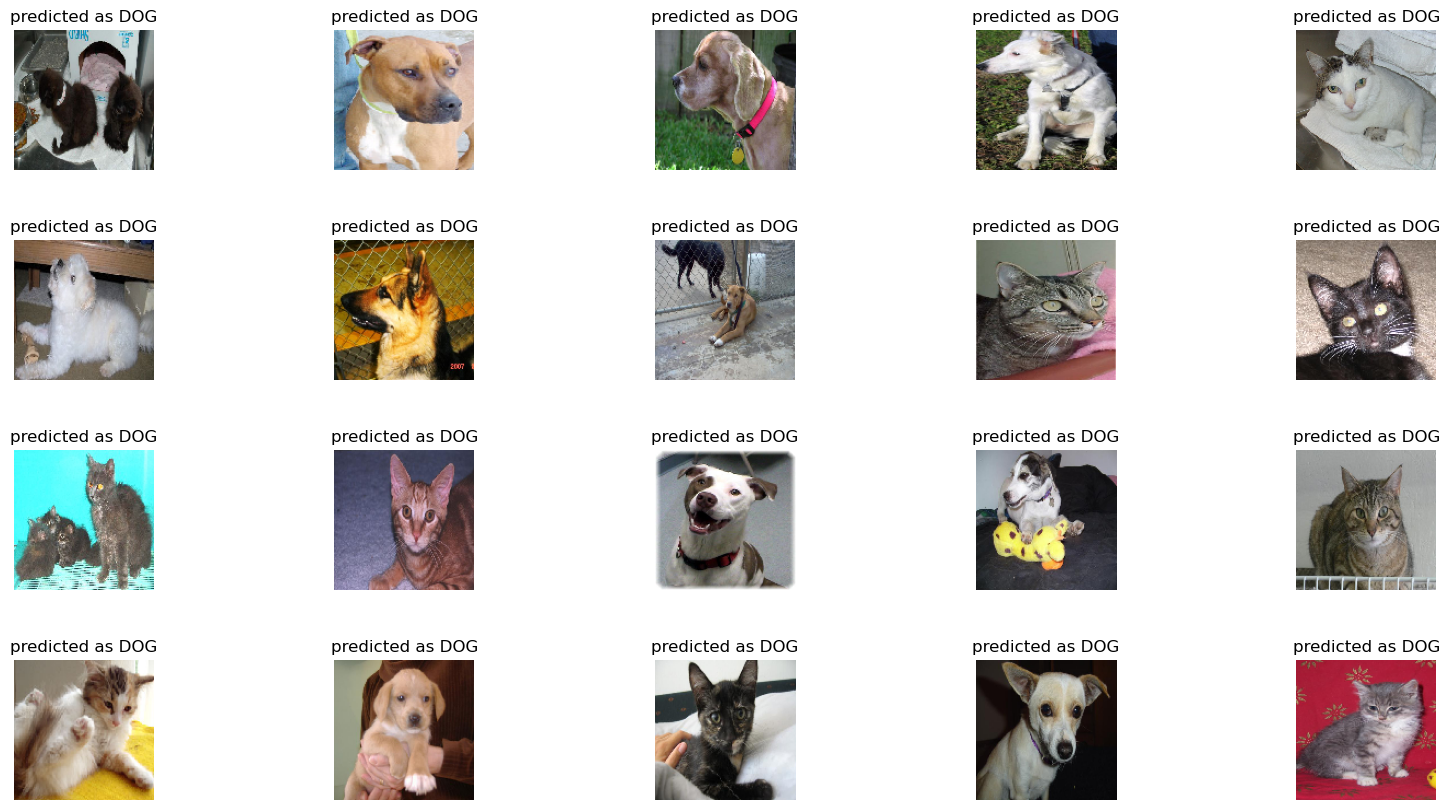

In [23]:
pred = model.predict_generator(test_set)

plt.subplots(4,5,figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
for i in range(20):
  plt.subplot(4,5,i+1)
  img = np.squeeze(test_set[i][0])
  plt.imshow(img)
  if pred[i]==0:
    plt.title('predicted as CAT',loc='center')
  else:
    plt.title('predicted as DOG',loc='center')
  plt.axis('off')
plt.show()

#we can see that all the images are predicted as 'DOG'

# The results are very unpleasing since we used ' SOFTMAX ' activation in the final output layer . ' SIGMOID ' activation would have given great results for the kind of problem . But as the problem stated to use softmax activation , we used that .